### Performing Decision Tree and Random Forest Analysis on the Kickstarter Data ###

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve

plt.style.use('ggplot')

In [23]:
kickstarter = pd.read_csv('kickstarter_04_25_19_ready_for_modeling.csv')

In [24]:
X = kickstarter[['goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater']]
y = kickstarter['state_successful']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 101)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(144934, 19) (144934,)
(62115, 19) (62115,)


In [26]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
max_depth = [4,5]
min_samples_split = [2,3]
min_samples_leaf = [2,3]
param_grid = dict(max_depth=max_depth, min_samples_split = min_samples_split, min_samples_leaf=min_samples_leaf )
tree = DecisionTreeClassifier()
tree_grid = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc', verbose=3, n_jobs=-1)
tree_grid.fit(X_train_scaled, y_train)
tree_grid_predictions = tree_grid.predict(X_test_scaled)
best_params = tree_grid.best_params_
best_estimator = tree_grid.best_estimator_
best_cm = confusion_matrix(y_test,tree_grid_predictions)
best_cr = classification_report(y_test,tree_grid_predictions)
print(best_params, best_estimator, best_cm, best_cr)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.5s finished


{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2} DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') [[15365 12980]
 [ 6697 27073]]               precision    recall  f1-score   support

           0       0.70      0.54      0.61     28345
           1       0.68      0.80      0.73     33770

   micro avg       0.68      0.68      0.68     62115
   macro avg       0.69      0.67      0.67     62115
weighted avg       0.69      0.68      0.68     62115



In [35]:
print('Best ROC_AUC for Decision Tree: %.3f', tree_grid.best_score_)
print(roc_auc_score(y_test,tree_grid_predictions))
print(roc_curve(y_test,tree_grid_predictions))
print("Accuracy: %.3f"% accuracy_score(y_test, tree_grid_predictions))

Best ROC_AUC for Decision Tree: %.3f 0.7259816403249192
0.6718794003179969
(array([0.        , 0.45792909, 1.        ]), array([0.        , 0.80168789, 1.        ]), array([2, 1, 0]))
Accuracy: 0.683


No handles with labels found to put in legend.


0.723388793260919


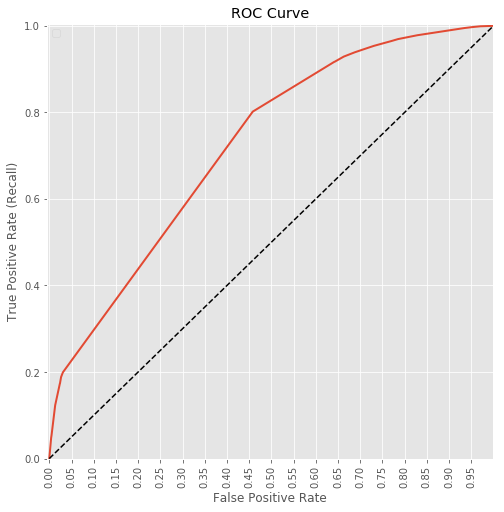

In [36]:
y_scores = tree_grid.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plt.figure(figsize=(8,8))
plt.title('ROC Curve')
plt.plot(fpr, tpr, linewidth=2,)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.005, 1, 0, 1.005])
plt.xticks(np.arange(0,1, 0.05), rotation=90)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc='best')

In [38]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(kickstarter[['goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater']])
features

['goal',
 'staff_pick_True',
 'cam_length',
 'blurb_length',
 'country_US',
 'main_category_comics',
 'main_category_crafts',
 'main_category_dance',
 'main_category_design',
 'main_category_fashion',
 'main_category_film & video',
 'main_category_food',
 'main_category_games',
 'main_category_journalism',
 'main_category_music',
 'main_category_photography',
 'main_category_publishing',
 'main_category_technology',
 'main_category_theater']

In [39]:
tree_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 5], 'min_samples_split': [2, 3], 'min_samples_leaf': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=3)

In [41]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

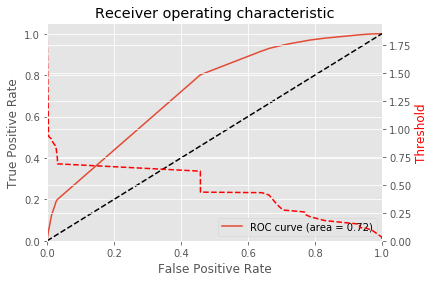

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr) # compute area under the curve
 
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])

plt.show()
#plt.savefig('roc_and_threshold.png')
#plt.close()

In [18]:
#n_estimators = [1000]
#max_features = ["auto", "sqrt", "log2", None]
#param_grid = dict(max_features = max_features, n_estimators = n_estimators)
forest_grid = GridSearchCV(forest, param_grid, cv=5, scoring='roc_auc', verbose=3, n_jobs=-1)
forest_grid.fit(X_train_scaled, y_train)
forest_grid_predictions = forest_grid.predict(X_test_scaled)
best_params = forest_grid.best_params_
best_estimator = forest_grid.best_estimator_
best_cm = confusion_matrix(y_test,forest_grid_predictions)
best_cr = classification_report(y_test,forest_grid_predictions)
print(best_params, best_estimator, best_cm, best_cr)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 67.7min finished
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 67.7min remaining:    0.0s


{'max_features': 'sqrt', 'n_estimators': 1000} RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) [[17677 10668]
 [ 9498 24272]]               precision    recall  f1-score   support

           0       0.65      0.62      0.64     28345
           1       0.69      0.72      0.71     33770

   micro avg       0.68      0.68      0.68     62115
   macro avg       0.67      0.67      0.67     62115
weighted avg       0.67      0.68      0.67     62115



In [19]:
print('Best ROC_AUC for Random Forest: %.3f', forest_grid.best_score_)
print(roc_auc_score(y_test,forest_grid_predictions))
print(roc_curve(y_test,forest_grid_predictions))
print("Accuracy: %.3f"% accuracy_score(y_test, forest_grid_predictions))

Best ROC_AUC for Random Forest: %.3f 0.7369634468772316
0.6711908867708483
(array([0.        , 0.37636267, 1.        ]), array([0.        , 0.71874445, 1.        ]), array([2, 1, 0]))
Accuracy: 0.675


In [20]:
y_scores = forest_grid.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))) # AUC of ROC
plt.figure(figsize=(8,8))
plt.title('ROC Curve')
plt.plot(fpr, tpr, linewidth=2,)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.005, 1, 0, 1.005])
plt.xticks(np.arange(0,1, 0.05), rotation=90)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc='best')

TypeError: auc() got an unexpected keyword argument 'label'

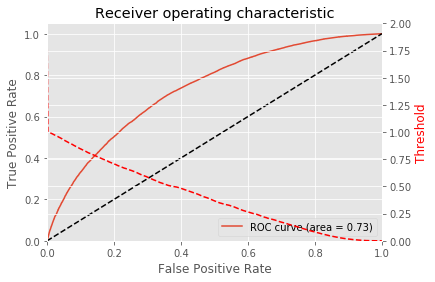

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr) # compute area under the curve
 
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])

plt.show()
#plt.savefig('roc_and_threshold.png')
#plt.close()

In [ ]:
forest_grid.best_estimator_.coef_